### TensorFlow & PyTorch comparison
Storing and handling data, creating datasets

<img src='https://cdn.activestate.com/wp-content/uploads/2019/10/neural-network-showndown-tensorflow-vs-pytorch.png' width = 650>

In [2]:
import tensorflow as tf
import torch

print('TensorFlow version:', tf.__version__)
print('PyTorch version:', torch.__version__)

import numpy as np
import warnings
warnings.filterwarnings('ignore')

TensorFlow version: 2.8.0
PyTorch version: 1.10.2


### Scalars

In [123]:
a = 4

a_np = np.array(a) 
a_tf = tf.constant(a)
a_torch = torch.tensor(a)

print(a_np, '\n')
print(a_tf, '\n')
print(a_torch, '\n')

# converting from numpy

tf_from_numpy = tf.convert_to_tensor(a_np)
torch_from_numpy = torch.from_numpy(a_np)

print(tf_from_numpy, '\n')
print(torch_from_numpy, '\n')

4 

tf.Tensor(4, shape=(), dtype=int32) 

tensor(4) 

tf.Tensor(4, shape=(), dtype=int32) 

tensor(4, dtype=torch.int32) 



In [65]:
print(a_tf.shape)
print(a_tf.dtype)
print(a_tf.numpy())

()
<dtype: 'int32'>
4


In [66]:
print(a_torch.shape)
print(a_torch.dtype)
print(a_torch.numpy())

torch.Size([])
torch.int64
4


In [125]:
print(torch_from_numpy.shape)
print(torch_from_numpy.dtype)
print(torch_from_numpy.numpy())

torch.Size([])
torch.int32
4


### Tensors

In [126]:
m = [[1, 1, 3], [1, 0, 2]]

m_np = np.array(m) 
m_tf = tf.constant(m)
m_torch = torch.tensor(m)

print(m_np, '\n')
print(m_tf, '\n')
print(m_torch, '\n')

# converting from numpy

tf_from_numpy = tf.convert_to_tensor(m_np)
torch_from_numpy = torch.from_numpy(m_np)

print(tf_from_numpy, '\n')
print(torch_from_numpy, '\n')

[[1 1 3]
 [1 0 2]] 

tf.Tensor(
[[1 1 3]
 [1 0 2]], shape=(2, 3), dtype=int32) 

tensor([[1, 1, 3],
        [1, 0, 2]]) 

tf.Tensor(
[[1 1 3]
 [1 0 2]], shape=(2, 3), dtype=int32) 

tensor([[1, 1, 3],
        [1, 0, 2]], dtype=torch.int32) 



In [68]:
print(m_tf.shape)
print(m_tf.dtype)

(2, 3)
<dtype: 'int32'>


In [69]:
print(m_torch.shape)
print(m_torch.dtype)

torch.Size([2, 3])
torch.int64


In [127]:
print(torch_from_numpy.shape)
print(torch_from_numpy.dtype)

torch.Size([2, 3])
torch.int32


### Multiplication, matrix multiplication

In [76]:
np.multiply(m_np, m_np)

array([[1, 1, 9],
       [1, 0, 4]])

In [77]:
tf.multiply(m_tf, m_tf)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 9],
       [1, 0, 4]])>

In [82]:
torch.multiply(m_torch, m_torch)

tensor([[1, 1, 9],
        [1, 0, 4]])

In [85]:
np.matmul(m_np, m_np.transpose())

array([[11,  7],
       [ 7,  5]])

In [81]:
tf.matmul(m_tf, tf.transpose(m_tf))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11,  7],
       [ 7,  5]])>

In [142]:
torch.matmul(m_torch, m_torch.T)

tensor([[11,  7],
        [ 7,  5]])

In [146]:
# all are equivalent to:
m_torch @ m_torch.T

tensor([[11,  7],
        [ 7,  5]])

### PyTorch device

PyTorch can directly access GPU too, so (after some config) it's your choice where you want to process the data

In [133]:
a_torch.device

device(type='cpu')

In [140]:
print(torch.cuda.is_available())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

if torch.cuda.is_available():
    a_torch = a_torch.to('cuda')

False
Using device: cpu


### PyTorch autograd

Automatically includes gradient in Tensors

Turning it off:
- for given tensor: `requires_grad=False` 
- globally: `with torch.nograd():`
    


<img src='https://camo.githubusercontent.com/fe04780daa63b97b30b69ce1208c40f74b9e33cda32128e6c8a9839587d7a216/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a774531663269374c385152773869755678356d4f70772e706e67' width = 550>

In [163]:
from torchviz import make_dot
from IPython.display import Image

In [364]:
x = torch.tensor(np.array([1, 2, 3, 4, 5], dtype = 'float'), requires_grad=True)

y = x**3 + x*2
z = y + 10

r = z.sum()

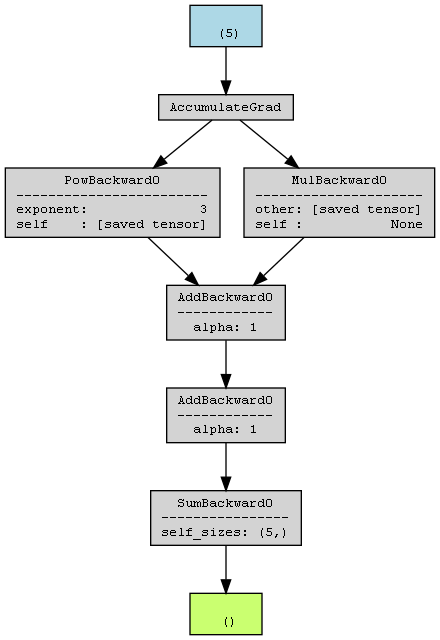

In [365]:
path_image = "torch_viz/attached"
_format = 'png'

make_dot(r, show_attrs = True).render(path_image, format = _format)
Image(path_image + '.' + _format, height = 450)

In [366]:
x

tensor([1., 2., 3., 4., 5.], dtype=torch.float64, requires_grad=True)

In [367]:
y

tensor([  3.,  12.,  33.,  72., 135.], dtype=torch.float64,
       grad_fn=<AddBackward0>)

In [368]:
z

tensor([ 13.,  22.,  43.,  82., 145.], dtype=torch.float64,
       grad_fn=<AddBackward0>)

In [369]:
r

tensor(305., dtype=torch.float64, grad_fn=<SumBackward0>)

In [370]:
x.grad_fn

In [371]:
y.grad_fn

In [372]:
z.grad_fn

In [373]:
r.grad_fn

'r' is the 'output', so we can 'backpropagate' to the very beginning

In [374]:
r.grad_fn

In [375]:
r.grad_fn.next_functions[0][0]

In [385]:
r.grad_fn.next_functions[0][0].next_functions[0][0]

In [388]:
r.grad_fn.next_functions[0][0].next_functions[0][0].next_functions

((<PowBackward0 at 0x208598db8b0>, 0), (<MulBackward0 at 0x208598dbdc0>, 0))

In [389]:
r.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0]

In [391]:
r.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions

()

How to get the actual derivatives?

In [392]:
r.backward()

In [393]:
x

tensor([1., 2., 3., 4., 5.], dtype=torch.float64, requires_grad=True)

In [394]:
x.grad

tensor([ 5., 14., 29., 50., 77.], dtype=torch.float64)

Function: $x^{3} + 2x$ + 10

Derivative: $3x^{2} + 2$ 

**x.grad elements are exactly the derivatives of x elements**

## Datasets for DL

For TF and torch come with their own dataset-handling wrappers that help training. The goal is to put the X and y in the most optimal format before training NNs


In [ ]:
import datetime
%load_ext tensorboard

In [892]:
np.random.seed(91)

X = np.random.sample((100, 4))
y = np.random.sample((100,1))


### TensorFlow

In [693]:
from tensorflow.data import Dataset

In [694]:
Dataset.from_tensor_slices((X, y))

<TensorSliceDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.float64, name=None))>

In [695]:
[x for x in Dataset.from_tensor_slices((X, y))][:10]

[(<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.2010036 , 0.32902047, 0.29649969, 0.09333367])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.0612686])>),
 (<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.33307881, 0.72522274, 0.65236274, 0.5048501 ])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.54184081])>),
 (<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.94733069, 0.62740158, 0.99228634, 0.07612124])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.92737875])>),
 (<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.34260853, 0.30693551, 0.71020463, 0.91731754])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.13922135])>),
 (<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.0809067 , 0.06283323, 0.5821683 , 0.66919822])>,
  <tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.15471663])>),
 (<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.00934138, 0.42192659, 0.39539143, 0.07320406])>,
  <tf.Tensor: shape=(

In [696]:
Dataset.from_tensors((X, y))

<TensorDataset element_spec=(TensorSpec(shape=(100, 4), dtype=tf.float64, name=None), TensorSpec(shape=(100, 1), dtype=tf.float64, name=None))>

In [697]:
[x for x in Dataset.from_tensors((X, y))]

[(<tf.Tensor: shape=(100, 4), dtype=float64, numpy=
  array([[2.01003596e-01, 3.29020466e-01, 2.96499689e-01, 9.33336685e-02],
         [3.33078812e-01, 7.25222741e-01, 6.52362744e-01, 5.04850095e-01],
         [9.47330686e-01, 6.27401578e-01, 9.92286341e-01, 7.61212443e-02],
         [3.42608527e-01, 3.06935514e-01, 7.10204635e-01, 9.17317543e-01],
         [8.09067005e-02, 6.28332321e-02, 5.82168300e-01, 6.69198223e-01],
         [9.34138260e-03, 4.21926589e-01, 3.95391432e-01, 7.32040611e-02],
         [7.70298271e-01, 1.89359253e-01, 4.68007755e-01, 6.51748528e-01],
         [8.16027127e-03, 6.79750095e-02, 7.46930174e-01, 1.57470213e-01],
         [5.34803513e-01, 6.76276363e-01, 5.19555276e-01, 5.19400301e-01],
         [4.65761552e-01, 2.44648008e-01, 9.11539972e-01, 1.07674240e-01],
         [4.81758821e-01, 7.48709547e-01, 3.84991610e-01, 7.51940803e-01],
         [7.59634340e-01, 2.87916462e-01, 6.73431352e-01, 1.75573862e-01],
         [6.71958510e-01, 2.96523407e-01, 5.0996

Add metainfo to the dataset
- shuffle: at each step randomly shuffle the dataset (buffer = take from first n)
- batch: set batch size for dataset

In [698]:
BATCH_SIZE = 10
SHUFFLE_BUFFER_SIZE = 20
EPOCHS = 75

train_dataset = Dataset.from_tensor_slices((X, y)).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [664]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', name = 'hidden-layer', input_shape = (X.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear', name = 'output-layer')
], name = 'Small-TF-model')

model.compile(optimizer = tf.optimizers.Adam(),
              loss = tf.losses.MeanSquaredError(),
              metrics = [tf.metrics.RootMeanSquaredError()])

model.build()

In [665]:
model.summary()

Model: "Small-TF-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer (Dense)        (None, 10)                50        
                                                                 
 output-layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


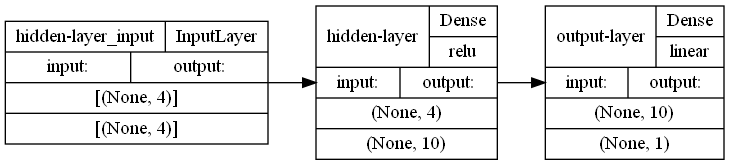

In [666]:
tf.keras.utils.plot_model(model, to_file = 'torch_viz/tf_model.png', show_shapes = True, rankdir = 'LR',
                         show_dtype = False, show_layer_activations = True)

In [667]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(train_dataset, epochs = EPOCHS, callbacks=[tensorboard_callback])

Epoch 1/75
10/10 [==============================] - 0s 10ms/step - loss: 0.2008 - root_mean_squared_error: 0.4481
Epoch 2/75
10/10 [==============================] - 0s 5ms/step - loss: 0.1760 - root_mean_squared_error: 0.4196
Epoch 3/75
10/10 [==============================] - 0s 5ms/step - loss: 0.1567 - root_mean_squared_error: 0.3959
Epoch 4/75
10/10 [==============================] - 0s 5ms/step - loss: 0.1430 - root_mean_squared_error: 0.3781
Epoch 5/75
10/10 [==============================] - 0s 5ms/step - loss: 0.1330 - root_mean_squared_error: 0.3647
Epoch 6/75
10/10 [==============================] - 0s 5ms/step - loss: 0.1265 - root_mean_squared_error: 0.3556
Epoch 7/75
10/10 [==============================] - 0s 5ms/step - loss: 0.1209 - root_mean_squared_error: 0.3478
Epoch 8/75
10/10 [==============================] - 0s 6ms/step - loss: 0.1178 - root_mean_squared_error: 0.3433
Epoch 9/75
10/10 [==============================] - 0s 8ms/step - loss: 0.1152 - root_mean_squa

10/10 [==============================] - 0s 6ms/step - loss: 0.0860 - root_mean_squared_error: 0.2933
Epoch 73/75
10/10 [==============================] - 0s 7ms/step - loss: 0.0861 - root_mean_squared_error: 0.2934
Epoch 74/75
10/10 [==============================] - 0s 7ms/step - loss: 0.0861 - root_mean_squared_error: 0.2934
Epoch 75/75
10/10 [==============================] - 0s 9ms/step - loss: 0.0860 - root_mean_squared_error: 0.2932


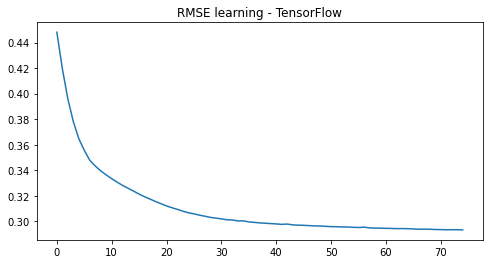

In [677]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history.epoch, history.history['root_mean_squared_error'])
plt.title('RMSE learning - TensorFlow')
plt.show()

Check tuned weights

In [669]:
model.layers

In [670]:
model.layers[0].get_weights()

[array([[ 0.13356616, -0.23184103, -0.5443132 , -0.10233116, -0.07444286,
          0.23965907,  0.47331697, -0.44415608, -0.36464047,  0.4053294 ],
        [-0.24472213,  0.5606812 ,  0.6454616 , -0.14087802,  0.50806445,
          0.03786996,  0.53562814,  0.03664297, -0.11097383,  0.3201848 ],
        [ 0.19557616, -0.62026364, -0.4806078 , -0.64110017,  0.37567306,
         -0.352611  ,  0.5403743 , -0.5973329 , -0.30109015, -0.612296  ],
        [-0.5067994 ,  0.45779827,  0.55326277, -0.35110492, -0.5225075 ,
          0.10500775,  0.0905146 ,  0.20704941, -0.53196853, -0.18111397]],
       dtype=float32),
 array([-0.07871248, -0.0500306 ,  0.07235297,  0.        ,  0.15256   ,
         0.08016496,  0.11844386, -0.01730376,  0.        ,  0.03492459],
       dtype=float32)]

In [671]:
model.layers[1].get_weights()

[array([[-0.41227996],
        [-0.4362163 ],
        [ 0.19085176],
        [-0.27895212],
        [ 0.20415822],
        [ 0.5237141 ],
        [ 0.35333878],
        [-0.40799072],
        [ 0.11117435],
        [-0.28733528]], dtype=float32),
 array([0.11085096], dtype=float32)]

Check TensorBoard

If need to kill: C:\Users\krist\AppData\Local\Temp\.tensorboard-info

In [676]:
#%tensorboard --logdir logs/fit


### PyTorch

In [699]:
# import torch

from torch.utils.data import TensorDataset, DataLoader

import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

Try some activations

In [769]:
i = np.array(0.23)
i = torch.Tensor(i)

print(F.elu(i))
print(F.relu(i))
print(F.leaky_relu(i))
print(F.celu(i))
print(F.gelu(i))
print(F.sigmoid(i))
print(F.softmax(i))
print(F.tanh(i))

tensor(0.2300)
tensor(0.2300)
tensor(0.2300)
tensor(0.2300)
tensor(0.1359)
tensor(0.5572)
tensor(1.)
tensor(0.2260)


In [770]:
i = np.array(-0.23)
i = torch.Tensor(i)

print(F.elu(i))
print(F.relu(i))
print(F.leaky_relu(i))
print(F.celu(i))
print(F.gelu(i))
print(F.sigmoid(i))
print(F.softmax(i))
print(F.tanh(i))

tensor(-0.2055)
tensor(0.)
tensor(-0.0023)
tensor(-0.2055)
tensor(-0.0941)
tensor(0.4428)
tensor(1.)
tensor(-0.2260)


In [700]:
print(X.shape)
print(y.shape)

(100, 4)
(100, 1)


In [736]:
torch_train_data = TensorDataset(torch.Tensor(X), torch.Tensor(y))
torch_train_data = DataLoader(torch_train_data, batch_size = BATCH_SIZE, shuffle = True)

In [737]:
torch_train_data

In [738]:
torch_train_data.dataset

In [739]:
torch_train_data.dataset.tensors[0].shape

torch.Size([100, 4])

In [740]:
torch_train_data.dataset.tensors[1].shape

torch.Size([100, 1])

In [742]:
torch_train_data.batch_size

10

Match structure of model built with TensorFlow

In [870]:
class Simple_torch_NN(nn.Module):
    
    def __init__(self):
        
        super(Simple_torch_NN, self).__init__()
        
        self.hidden = nn.Linear(4, 10)
        self.output = nn.Linear(10, 1)
 
    def forward(self, x):
        
        x = F.relu(self.hidden(x))
        x = self.output(x)
        
        return x

In [871]:
torch_model = Simple_torch_NN()

In [872]:
torch_model

Simple_torch_NN(
  (hidden): Linear(in_features=4, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)

Initial random weights

In [873]:
# for param in torch_model.parameters():
#     print(param, '\n')

for name, param in torch_model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param} \n")

Layer: hidden.weight | Size: torch.Size([10, 4]) | Values : Parameter containing:
tensor([[-0.1148, -0.1211, -0.3228, -0.3429],
        [-0.4986, -0.1641, -0.4776,  0.4820],
        [-0.0630,  0.0043,  0.3528, -0.2172],
        [ 0.0375,  0.2093,  0.2909, -0.2861],
        [ 0.3662,  0.4613,  0.4985, -0.2018],
        [-0.4667,  0.1171,  0.3542, -0.3020],
        [-0.4878,  0.3550, -0.3201, -0.2226],
        [ 0.1609, -0.0395,  0.0793, -0.2767],
        [-0.1634, -0.1738, -0.3835, -0.0221],
        [ 0.1847,  0.0878,  0.0282,  0.4210]], requires_grad=True) 

Layer: hidden.bias | Size: torch.Size([10]) | Values : Parameter containing:
tensor([-0.1178, -0.0932,  0.1095, -0.0942, -0.2754,  0.1748, -0.2523, -0.1357,
        -0.2419,  0.1356], requires_grad=True) 

Layer: output.weight | Size: torch.Size([1, 10]) | Values : Parameter containing:
tensor([[-0.0503,  0.2229,  0.0749,  0.1116,  0.1965, -0.2566, -0.3107,  0.2854,
          0.1715,  0.0402]], requires_grad=True) 

Layer: output.b

Compile

In [874]:
optimizer = optim.Adam(torch_model.parameters(), eps = 1e-07) # to match TF
loss = nn.MSELoss()

Train

- For PyTorch when training a model set it to `.train()`, when using it for inference set it to `.eval()`
- During training in each epoch's each batch reset the gradients by `optimizer.zero_grad()`
- Suggestion is to create 1 function for training, 1 for evaluating


In [877]:
train_losses = []

def train_loop(dataloader, model, loss_fn, optimizer):
    
    model.train()
    
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    train_loss = 0
    
    for batch, (X, y) in enumerate(dataloader):
        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

#         if batch % 3 == 0:
#             loss, current = loss.item()**(1/2), batch * len(X)
#             print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
#             train_losses.append(loss)

        train_loss += loss.item()**(1/2)
    
    train_loss /= num_batches
    train_losses.append(train_loss)
    print(f"Avg train loss: {train_loss:>8f}")


def test_loop(dataloader, model, loss_fn):
    
    model.eval()
    
    size = len(dataloader.dataset)    
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        
        for X, y in dataloader:
            
            pred = model(X)
            test_loss += loss_fn(pred, y).item()**(1/2)
            #correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    #correct /= size
    print(f"Avg test loss: {test_loss:>8f} \n") #Test Error: \n Accuracy: {(100*correct):>0.1f}%, 

In [878]:
for t in range(EPOCHS):
    
    print(f"Epoch {t+1}\n-------------------------------")
    
    train_loop(torch_train_data, torch_model, loss, optimizer)
    test_loop(torch_train_data, torch_model, loss)
    
print("Done!")

Epoch 1
-------------------------------
Avg train loss: 0.760489
Avg test loss: 0.745268 

Epoch 2
-------------------------------
Avg train loss: 0.727816
Avg test loss: 0.707082 

Epoch 3
-------------------------------
Avg train loss: 0.689296
Avg test loss: 0.671457 

Epoch 4
-------------------------------
Avg train loss: 0.647604
Avg test loss: 0.631364 

Epoch 5
-------------------------------
Avg train loss: 0.615881
Avg test loss: 0.590032 

Epoch 6
-------------------------------
Avg train loss: 0.568216
Avg test loss: 0.549520 

Epoch 7
-------------------------------
Avg train loss: 0.526714
Avg test loss: 0.505704 

Epoch 8
-------------------------------
Avg train loss: 0.488659
Avg test loss: 0.459039 

Epoch 9
-------------------------------
Avg train loss: 0.444385
Avg test loss: 0.418584 

Epoch 10
-------------------------------
Avg train loss: 0.407750
Avg test loss: 0.384933 

Epoch 11
-------------------------------
Avg train loss: 0.370165
Avg test loss: 0.353906

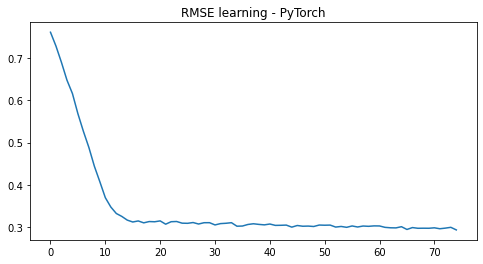

In [879]:
plt.figure(figsize=(8, 4))
plt.plot([i for i in range(EPOCHS)], train_losses)
plt.title('RMSE learning - PyTorch')
plt.show()

Check if PyTorch model is in `eval()` or `train()` mode

In [880]:
torch_model.training

False

Check layer gradients

In [881]:
torch_model.output.bias

Parameter containing:
tensor([-0.1305], requires_grad=True)

In [882]:
torch_model.output.bias.grad

tensor([0.0007])

TF and torch reached similar losses with the same structured models and running for same number of epochs

In [963]:
print('Last train loss reached with TensorFlow:', history.history['root_mean_squared_error'][-1])
print('Last train loss reached with PyTorch:', train_losses[-1])

Last train loss reached with TensorFlow: 0.29321184754371643
Last train loss reached with PyTorch: 0.29412197459558964


#### Make predictions

In [964]:
from sklearn.metrics import mean_squared_error

In [966]:
TF_predictions = model.predict(X)
torch_predictions = torch_model(torch_train_data.dataset.tensors[0])

print('RMSE TF:', mean_squared_error(y, TF_predictions, squared=False))
print('RMSE PyTorch:', mean_squared_error(y, torch_predictions.detach().numpy(), squared=False))

RMSE TF: 0.29287459055896337
RMSE PyTorch: 0.3008924829532329
